# 1. Import and Install Dependencies

!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Landmarks using MP Holistic

In [8]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [9]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [10]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [11]:
def draw_styled_landmarks(image, results):
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

# 3. Sample Testing of hand keypoints

In [17]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

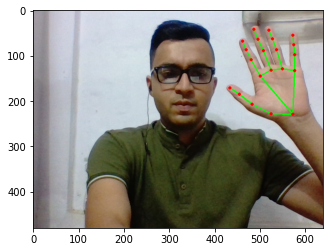

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
len(results.left_hand_landmarks.landmark)

21

# 4. Extracting Keypoint Values

In [12]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [12]:
result_test = extract_keypoints(results)

In [13]:
result_test

array([ 8.95722985e-01,  4.77491140e-01, -8.30525241e-05,  8.20859492e-01,
        4.75814283e-01, -2.11724658e-02,  7.55336642e-01,  4.33299601e-01,
       -2.93073356e-02,  7.11458445e-01,  3.86216789e-01, -4.09673415e-02,
        6.78838253e-01,  3.56263161e-01, -5.44333495e-02,  7.82887578e-01,
        3.02778840e-01,  2.17173286e-02,  7.52217829e-01,  2.28538066e-01,
        1.84197295e-02,  7.35899270e-01,  1.81790277e-01,  5.31714084e-03,
        7.23060191e-01,  1.42022952e-01, -5.34957461e-03,  8.20362568e-01,
        2.76101023e-01,  1.85060333e-02,  7.94170916e-01,  1.87125325e-01,
        2.63212677e-02,  7.76509941e-01,  1.33822381e-01,  9.02559794e-03,
        7.62398303e-01,  8.84414762e-02, -7.41715357e-03,  8.59461308e-01,
        2.69587696e-01,  9.05301515e-03,  8.39196205e-01,  1.82433277e-01,
        1.17479321e-02,  8.25209022e-01,  1.33079156e-01, -2.30591930e-03,
        8.12838137e-01,  9.28284526e-02, -1.54333469e-02,  9.02891159e-01,
        2.77938336e-01, -

# 5. Setup Folders for Data Collection

In [13]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Data_Collection') 

# Actions that we try to detect
actions = np.array(['A','B','C','D','E','F','G','H','I','J','K','L',
                    'M','N','O','P','Q','R','S','T','U','V','W','X',
                    'Y','Z','0','1','2','3','4','5','6','7','8','9',
                    'Thank You','Namaste','Yes','No'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [14]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 6. Collect Keypoint Values for Training and Testing

In [20]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences as a videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length as a sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'CAPTURE', (150,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collect Sign of {} with frame no.  {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(300)
                else: 
                    cv2.putText(image, 'Collect Sign of {} with frame no. {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [21]:
cap.release()
cv2.destroyAllWindows()

# 7. Preprocessing of Data

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}

In [24]:
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 '0': 26,
 '1': 27,
 '2': 28,
 '3': 29,
 '4': 30,
 '5': 31,
 '6': 32,
 '7': 33,
 '8': 34,
 '9': 35,
 'Thank You': 36,
 'Namaste': 37,
 'Yes': 38,
 'No': 39}

In [25]:
#Saving the keypoints in a numpy array
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [26]:
np.array(sequences).shape

(1200, 30, 126)

In [27]:
np.array(labels).shape

(1200,)

In [28]:
X = np.array(sequences)

In [29]:
X.shape

(1200, 30, 126)

In [30]:
y = to_categorical(labels).astype(int)

In [31]:
#Performing Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [32]:
y_test.shape

(60, 40)

# 8. Training the model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
%load_ext tensorboard
import datetime, os

In [36]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [56]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [57]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [58]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
36/36 [==============================] - 4s 68ms/step - loss: 3.6124 - categorical_accuracy: 0.0567
Epoch 2/500
36/36 [==============================] - 1s 32ms/step - loss: 3.2829 - categorical_accuracy: 0.0764
Epoch 3/500
36/36 [==============================] - 1s 29ms/step - loss: 2.6867 - categorical_accuracy: 0.1629
Epoch 4/500
36/36 [==============================] - 1s 29ms/step - loss: 2.6799 - categorical_accuracy: 0.2091
Epoch 5/500
36/36 [==============================] - 1s 32ms/step - loss: 2.2592 - categorical_accuracy: 0.2488
Epoch 6/500
36/36 [==============================] - 1s 30ms/step - loss: 2.1341 - categorical_accuracy: 0.3870
Epoch 7/500
36/36 [==============================] - 1s 30ms/step - loss: 1.9988 - categorical_accuracy: 0.3562
Epoch 8/500
36/36 [==============================] - 1s 30ms/step - loss: 1.6732 - categorical_accuracy: 0.4477
Epoch 9/500
36/36 [==============================] - 1s 29ms/step - loss: 1.4685 - categorical_accuracy:

36/36 [==============================] - 1s 30ms/step - loss: 0.1026 - categorical_accuracy: 0.9686
Epoch 146/500
36/36 [==============================] - 1s 33ms/step - loss: 0.0481 - categorical_accuracy: 0.9861
Epoch 147/500
36/36 [==============================] - 1s 33ms/step - loss: 0.0527 - categorical_accuracy: 0.9885
Epoch 148/500
36/36 [==============================] - 1s 31ms/step - loss: 0.0486 - categorical_accuracy: 0.9813
Epoch 149/500
36/36 [==============================] - 1s 31ms/step - loss: 0.0580 - categorical_accuracy: 0.9804
Epoch 150/500
36/36 [==============================] - 1s 31ms/step - loss: 0.1072 - categorical_accuracy: 0.9651
Epoch 151/500
36/36 [==============================] - 1s 32ms/step - loss: 0.0351 - categorical_accuracy: 0.9863
Epoch 152/500
36/36 [==============================] - 1s 37ms/step - loss: 0.0297 - categorical_accuracy: 0.9902
Epoch 153/500
36/36 [==============================] - 1s 30ms/step - loss: 0.0216 - categorical_accur

Epoch 217/500
36/36 [==============================] - 1s 32ms/step - loss: 0.0851 - categorical_accuracy: 0.9697
Epoch 218/500
36/36 [==============================] - 1s 36ms/step - loss: 0.0953 - categorical_accuracy: 0.9734
Epoch 219/500
36/36 [==============================] - 1s 34ms/step - loss: 0.0475 - categorical_accuracy: 0.9911
Epoch 220/500
36/36 [==============================] - 1s 33ms/step - loss: 0.0750 - categorical_accuracy: 0.9711
Epoch 221/500
36/36 [==============================] - 1s 34ms/step - loss: 0.0451 - categorical_accuracy: 0.9818
Epoch 222/500
36/36 [==============================] - 1s 32ms/step - loss: 0.0434 - categorical_accuracy: 0.9880
Epoch 223/500
36/36 [==============================] - 1s 30ms/step - loss: 0.0382 - categorical_accuracy: 0.9873
Epoch 224/500
36/36 [==============================] - 1s 31ms/step - loss: 0.0230 - categorical_accuracy: 0.9893
Epoch 225/500
36/36 [==============================] - 1s 29ms/step - loss: 0.0189 - cat

Epoch 360/500
36/36 [==============================] - 1s 33ms/step - loss: 0.0352 - categorical_accuracy: 0.9896
Epoch 361/500
36/36 [==============================] - 1s 29ms/step - loss: 0.0193 - categorical_accuracy: 0.9944
Epoch 362/500
36/36 [==============================] - 1s 30ms/step - loss: 0.0206 - categorical_accuracy: 0.9922
Epoch 363/500
36/36 [==============================] - 1s 30ms/step - loss: 0.0236 - categorical_accuracy: 0.9895
Epoch 364/500
36/36 [==============================] - 1s 30ms/step - loss: 0.0142 - categorical_accuracy: 0.9948
Epoch 365/500
36/36 [==============================] - 1s 30ms/step - loss: 0.0131 - categorical_accuracy: 0.9969
Epoch 366/500
36/36 [==============================] - 1s 29ms/step - loss: 0.0201 - categorical_accuracy: 0.9925
Epoch 367/500
36/36 [==============================] - 1s 30ms/step - loss: 0.0313 - categorical_accuracy: 0.9915
Epoch 368/500
36/36 [==============================] - 1s 32ms/step - loss: 0.0245 - cat

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            48896     
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 40)                2600      
Total params: 199,720
Trainable params: 199,720
Non-trainable params: 0
_________________________________________________________________


# 9. Making the Predictions

In [60]:
res = model.predict(X_test)

In [61]:
actions[np.argmax(res[5])]

'O'

In [62]:
actions[np.argmax(y_test[5])]

'O'

# 10. Saving Model 

In [71]:
model.save('Realtime_Sign.h5')

In [ ]:
model.load_weights('Realtime_Sign.h5')

# 11. Confusion Matrix and Accuracy Score and Classification Report

In [73]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score,classification_report

In [74]:
yhat = model.predict(X_test)

In [75]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [76]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[59,  0],
        [ 0,  1]],

       [[56,  0],
        [ 1,  3]],

       [[57,  0],
        [ 0,  3]],

       [[59,  0],
        [ 0,  1]],

       [[58,  0],
        [ 0,  2]],

       [[59,  0],
        [ 0,  1]],

       [[59,  0],
        [ 0,  1]],

       [[59,  0],
        [ 0,  1]],

       [[59,  0],
        [ 0,  1]],

       [[59,  0],
        [ 0,  1]],

       [[58,  2],
        [ 0,  0]],

       [[58,  0],
        [ 0,  2]],

       [[58,  0],
        [ 0,  2]],

       [[58,  0],
        [ 0,  2]],

       [[58,  1],
        [ 0,  1]],

       [[58,  0],
        [ 0,  2]],

       [[56,  0],
        [ 0,  4]],

       [[59,  0],
        [ 0,  1]],

       [[59,  0],
        [ 0,  1]],

       [[59,  0],
        [ 0,  1]],

       [[56,  0],
        [ 0,  4]],

       [[59,  0],
        [ 0,  1]],

       [[59,  0],
        [ 0,  1]],

       [[58,  1],
        [ 0,  1]],

       [[57,  0],
        [ 0,  3]],

       [[58,  0],
        [ 0,  2]],

       [[59,

In [77]:
accuracy_score(ytrue, yhat)

0.9

In [70]:
print(classification_report(,ytrue, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         0
          12       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       0.50      1.00      0.67         1
          18       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         4
          20       1.00    

C:\Users\91913\.conda\envs\final\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91913\.conda\envs\final\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91913\.conda\envs\final\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91913\.conda\envs\final\lib\si

# 12. Realtime Testing

In [18]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. sentence logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 1: 
                sentence = sentence[-1:]

        cv2.rectangle(image, (0, 410), (769, 505), (8, 8, 8, 0.75), -1)
        cv2.putText(image, ' '.join(sentence), (300,450), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('PREDICTION', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>
8
<class 'mediapipe.python.solution_base.SolutionOutputs'>